In [11]:
import numpy as np
import matplotlib.pyplot as plt
import types

In [1]:
%cd ../
import pyMelt as m
%cd dev

/Users/sm905/repos/pyMelt
/Users/sm905/repos/pyMelt/dev


In [3]:
m.__version__

'3.dev0'

In [4]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()

In [5]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

In [6]:
column = mantle.adiabaticMelt(1500.0, dP=-0.004)

/Users/sm905/repos/pyMelt/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


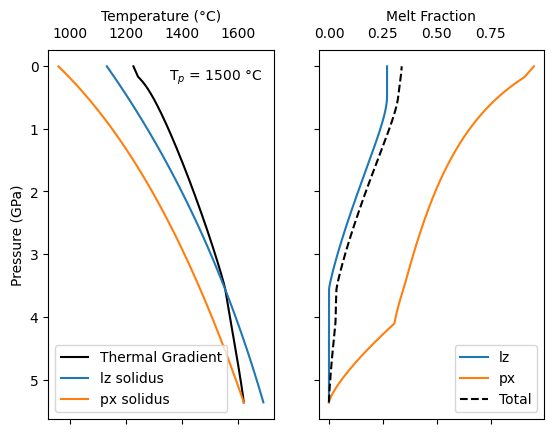

In [7]:
fig, ax = column.plot()

plt.show()

In [9]:
phasediag_klb1 = m.load_phaseDiagram('thermocalc_klb1')
phasediag_kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [10]:
column.calculateChemistry(elements={'lz': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    'px': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    },
                          method='phase_diagram_major',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1})

In [12]:
def calculateStableIsotopes(self, species, phaseDiagram, fractionationFactors):
    """
    Write some documentation here...
    """



column.calculateStableIsotopes = types.MethodType(calculateStableIsotopes, column)

In [13]:
def olv_alphaFe():



species = ['FeO', 'Fe2O3']
phaseDiagram = {'lz': phasediag_klb1,
                'px': phasediag_kg1}
fractionationFactors = {'olv': 0.0,
                        'cpx': 0.0,
                        'opx': 0.0,
                        'grt': 0.0,
                        'spn': 0.0,
                        'plg': 0.0}


hi


In [15]:
for var in phasediag_klb1.variables:
    print(var)

pressure
temperature
X
cpx
cpx_Al2O3
cpx_CaO
cpx_Cr2O3
cpx_FeO
cpx_K2O
cpx_MgO
cpx_Na2O
cpx_SiO2
cpx_TiO2
cpx_xAlM1
cpx_xAlT
cpx_xCaM2
cpx_xCrM1
cpx_xFe3M1
cpx_xFeM1
cpx_xFeM2
cpx_xKM2
cpx_xMgM1
cpx_xMgM2
cpx_xNaM2
cpx_xSiT
cpx_xTiM1
liq
liq_Al2O3
liq_AlM
liq_CaM
liq_CaO
liq_Cr2O3
liq_FeO
liq_K2O
liq_MgO
liq_Na2O
liq_SiO2
liq_TiO2
liq_feM
liq_mgM
liq_pct
liq_pek
liq_phm
liq_pjd
liq_pkj
liq_pol
liq_pq
liq_psl
liq_pti
liq_pwo
liq_sumM
olv
olv_Al2O3
olv_CaO
olv_Cr2O3
olv_FeO
olv_K2O
olv_MgO
olv_Na2O
olv_SiO2
olv_TiO2
olv_xCaM2
olv_xFeM1
olv_xFeM2
olv_xMgM1
olv_xMgM2
opx
opx_Al2O3
opx_CaO
opx_Cr2O3
opx_FeO
opx_K2O
opx_MgO
opx_Na2O
opx_SiO2
opx_TiO2
opx_xAlM1
opx_xAlT
opx_xCaM2
opx_xCrM1
opx_xFe3M1
opx_xFeM1
opx_xFeM2
opx_xMgM1
opx_xMgM2
opx_xNaM2
opx_xSiT
opx_xTiM1
plg
plg_Al2O3
plg_CaO
plg_Cr2O3
plg_FeO
plg_K2O
plg_MgO
plg_Na2O
plg_SiO2
plg_TiO2
plg_x(Ca)
plg_x(K)
plg_x(Na)
spn
spn_Al2O3
spn_CaO
spn_Cr2O3
spn_FeO
spn_K2O
spn_MgO
spn_Na2O
spn_SiO2
spn_TiO2
spn_xAlM
spn_xAlT
spn_xCrM
spn_xF